#**✨Análisis Exploratorio y Preprocesamiento de Datos✨**

El primer paso consiste en la selección de los datos que se van a utilizar, se deben filtrar únicamente los anuncios de propiedades de tipo vivienda (Casa, PH y Departamento) ubicados en Capital Federal cuyo tipo de operación sea venta y su precio se encuentre en dólares (USD).

# **A) Exploración Inicial : analizar cada variable, considerando los siguientes aspectos**

🐍 Tipo de variable

> Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1, q3,moda

> Variables Cualitativas: mostrar cantidad de valores posibles, y frecuencias de cada uno.

🐍 Determinar variables irrelevantes en el análisis (Ids por ejemplo)

🐍 Realizar un análisis gráfico de las distribuciones de las variables

🐍 Analizar las correlaciones existentes entre las variables.



In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
#Cargar archivo csv desde Google Drive
url = 'https://drive.google.com/uc?id=1MLlgjZULEkwQYr8XphT5mNgS5SCmAiyp'
anuncios = pd.read_csv(url)

In [ ]:
# Ver las columnas disponibles
print(anuncios.columns)

In [ ]:
#Ver los datos de las siguientes columnas
print(anuncios[['place_l2', 'place_l3', 'place_l4', 'place_l5', 'place_l6']])

In [ ]:
#Ver los primeros resultados
print(anuncios.head())

In [ ]:
# Filtrar anuncios
tipo_de_vivienda = ['Casa', 'PH', 'Departamento']
tipo_de_operacion = 'Venta'
tipo_de_moneda = 'USD'
ubicacion = 'Capital Federal'

filtros = (anuncios['property_type'].isin(tipo_de_vivienda) &
           (anuncios['operation'] == tipo_de_operacion) &
           (anuncios['property_currency'] == tipo_de_moneda) &
           (anuncios['place_l2'] == ubicacion))

# Ver data filtrada segun vivienda, operacion, moneda y ubicacion
anuncios_filtrados = anuncios[filtros]

print("Anuncios filtrados:")
print(anuncios_filtrados)

🐍 Tipo de variables:

In [ ]:
tipos_de_varialbes = anuncios_filtrados.dtypes
print(tipos_de_varialbes)

Variables Cuantitativas:

> Calcula medidas de resumen: media, mediana, primer cuartil (q1), tercer cuartil (q3), y la moda.

In [ ]:
anuncios_filtrados.describe()

In [ ]:
#Biblioteca Numerical Python
import numpy as np

#Media
media = anuncios_filtrados['property_price'].mean()

#Mediana
mediana = anuncios_filtrados['property_price'].median()

#Primer cuatril (q1)
q1 = np.percentile(anuncios_filtrados['property_price'], 25)

#Tercer cuatril (q3)
q3 = np.percentile(anuncios_filtrados['property_price'], 75)

#Moda
moda = anuncios_filtrados['property_price'].mode().values[0]

#Resultados
print("Media: USD", int(media))
print("Mediana: USD", int(mediana))
print("Primer Cuartil (Q1): USD", int(q1))
print("Tercer Cuartil (Q3): USD", int(q3))
print("Moda: USD", int(moda))



Variables Cualitativas:

> Mostrar cantidad de valores posibles, y frecuencias de cada uno.

In [ ]:
# Variables Cualitativas
variables_cualitativas = ['property_type', 'operation', 'property_currency', 'property_title']

for variable in variables_cualitativas:
    print(f"Variable: {variable}")
    print(f"Valores posibles: {anuncios_filtrados[variable].nunique()}")
    print(f"Frecuencias de cada valor:")
    print(anuncios_filtrados[variable].value_counts())
    print("\n")


🐍 Determinar variables irrelevantes en el análisis (Ids por ejemplo)

In [ ]:
# Eliminar las columnas_irrelevantes
variables_irrelevantes = ['created_on', 'place_l3', 'place_l4', 'place_l5', 'place_l6', 'property_bedrooms', 'property_surface_total',  'property_surface_covered', 'property_title']
variables_relevantes = anuncios_filtrados.drop(variables_irrelevantes, axis=1)

# Mostrar el resultado con las columnas restantes al lado de la otra
print(variables_relevantes)


🐍 Realizar un análisis gráfico de las distribuciones de las variables

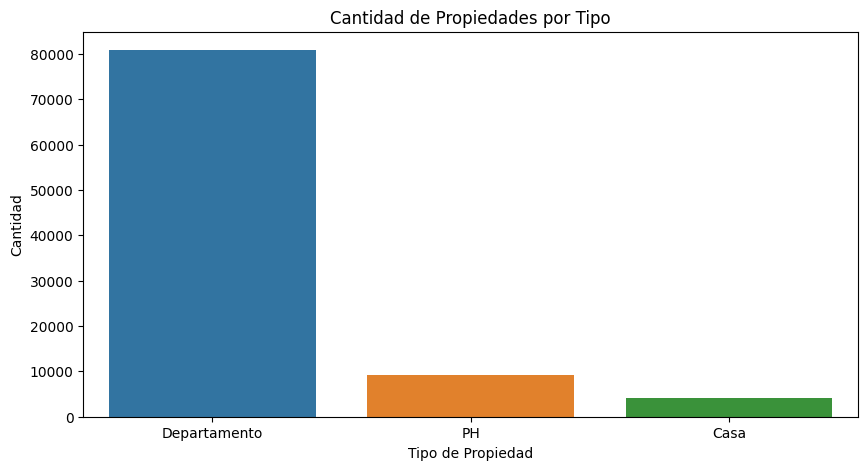

In [15]:
tipo_de_propiedad = anuncios_filtrados['property_type'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=tipo_de_propiedad.index, y=tipo_de_propiedad.values)
plt.title('Cantidad de Propiedades por Tipo')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad')
plt.show()

In [16]:
anuncios_filtrados['property_type'].value_counts()

Departamento    80829
PH               9266
Casa             4154
Name: property_type, dtype: int64

Text(0, 0.5, 'Cantidad')

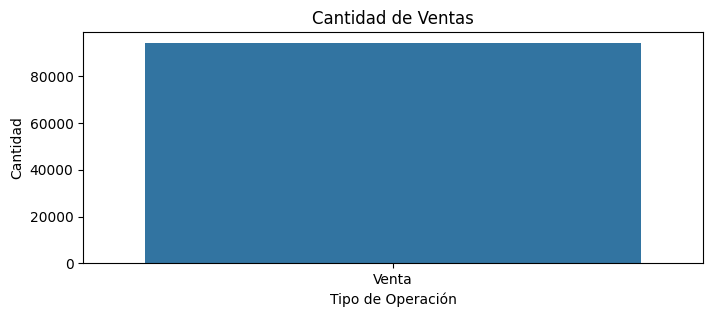

In [17]:
tipo_de_operacion = anuncios_filtrados['operation'].value_counts()
plt.figure(figsize=(8, 3))
sns.barplot(x=tipo_de_operacion.index, y=tipo_de_operacion.values)
plt.title('Cantidad de Ventas')
plt.xlabel('Tipo de Operación')
plt.ylabel('Cantidad')

In [18]:
anuncios_filtrados['operation'].value_counts()

Venta    94249
Name: operation, dtype: int64

Text(0, 0.5, 'Cantidad')

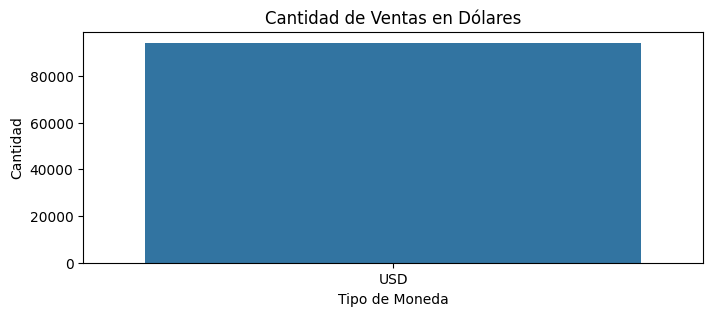

In [19]:
tipo_de_moneda = anuncios_filtrados['property_currency'].value_counts()
plt.figure(figsize=(8, 3))
sns.barplot(x=tipo_de_moneda.index, y=tipo_de_moneda.values)
plt.title('Cantidad de Ventas en Dólares')
plt.xlabel('Tipo de Moneda')
plt.ylabel('Cantidad')

In [20]:
anuncios_filtrados['property_currency'].value_counts()

USD    94249
Name: property_currency, dtype: int64

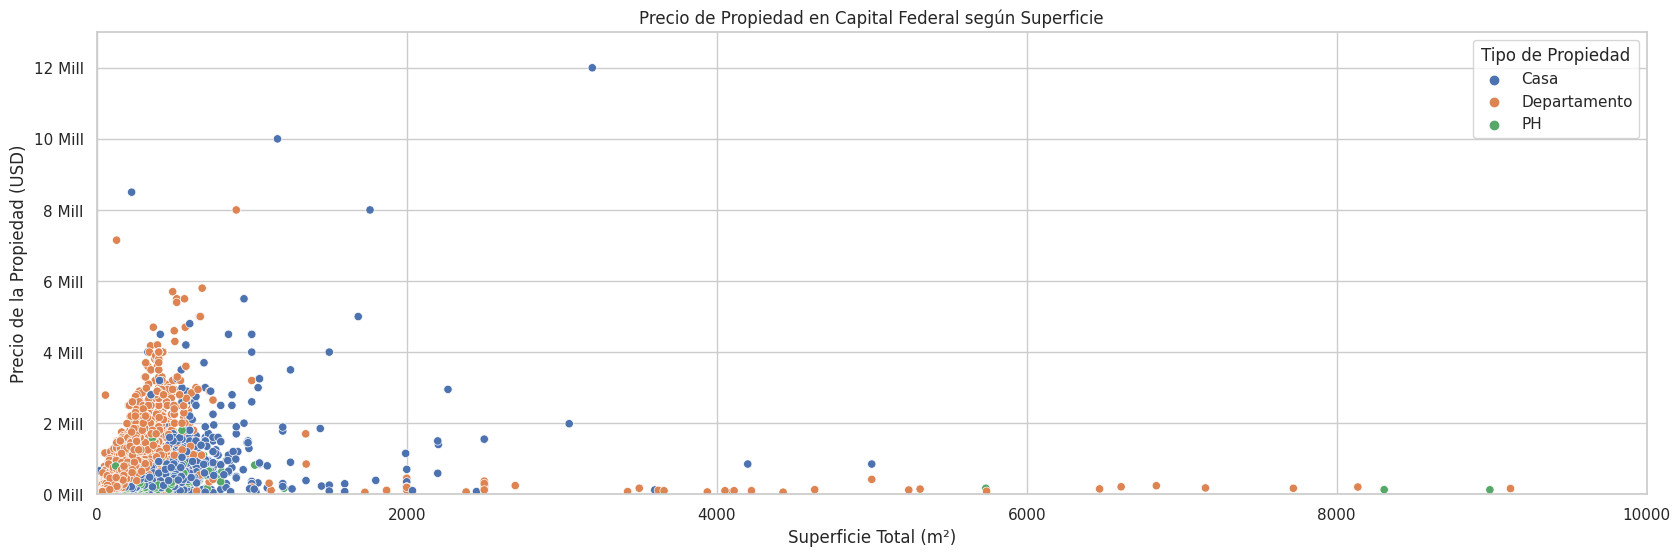

In [22]:
#Biblioteca que proporciona herramientas para personalizar la apariencia de los ejes de un gráfico,
#incluyendo la forma en que se muestran los números en esos ejes.
import matplotlib.ticker as ticker

#Gráfico de Dispersión
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.scatterplot(data=anuncios_filtrados, x='property_surface_total', y='property_price', hue='property_type')
plt.title("Precio de Propiedad en Capital Federal según Superficie")
plt.xlabel("Superficie Total (m²)")
plt.ylabel("Precio de la Propiedad (USD)")
plt.xlim(0, 10000)
plt.ylim(0, 13000000)
#Linea para indicar que el eje Y está en millones
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f} Mill'.format(x * 1e-6)))
plt.legend(title="Tipo de Propiedad")


#**B) Datos Faltantes : analizar la presencia de datos faltantes en el dataset**
*texto en cursiva*🐍 Realizar análisis de datos faltantes a nivel de columna. Graficar para cada variable el porcentaje de datos faltantes con respecto al total del dataset.
texto en negrita
🐍 Realizar un análisis de datos faltantes a nivel de fila. Calcular el porcentaje de datos faltantes de cada registro.

🐍 Realizar un gráfico que permita conocer la proporción de faltantes por fila en el dataset.

🐍Determinar, de ser posible, estrategias para reparar los valores faltantes.
En caso de realizar imputaciones comparar las distribuciones de cada atributo reparado con la distribución anterior a la imputación de los datos faltantes.


🐍 Realizar análisis de datos faltantes a nivel de columna. Graficar para cada variable el porcentaje de datos faltantes con respecto al total del dataset.

In [29]:
num_columnas = anuncios_filtrados.shape[1]
print(f"anuncios_filtrados tiene {num_columnas} columnas.")

anuncios_filtrados tiene 20 columnas.


Text(0, 0.5, 'Porcentaje de datos faltantes')

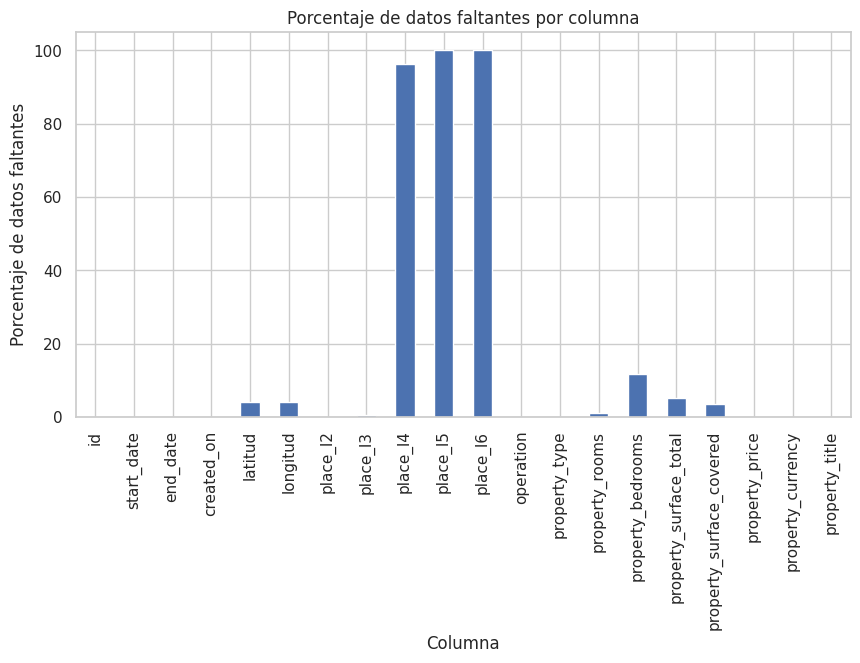

In [23]:
column_faltantes = anuncios_filtrados.isnull().mean() * 100
#anuncios_filtrados.isnull(): crea un DataFrame booleano, cada elemento es True si el valor es nulo (NaN)
#mean: calcula la media de los valores booleanos
#* 100: multiplica el resultado por 100 para sacar el porcentaje
plt.figure(figsize=(10, 5))
column_faltantes.plot(kind='bar')
plt.title('Porcentaje de datos faltantes por columna')
plt.xlabel('Columna')
plt.ylabel('Porcentaje de datos faltantes')

🐍 Realizar un análisis de datos faltantes a nivel de fila. Calcular el porcentaje de datos faltantes de cada registro.

In [30]:
num_filas = anuncios_filtrados.shape[0]
print(f"anuncios_filtrados tiene {num_filas} filas.")

anuncios_filtrados tiene 94249 filas.


In [70]:
# Se calcula el porcentaje de datos faltantes por fila y se pasa como cadena
porcentaje_faltantes_por_fila = (anuncios_filtrados.isnull().mean(axis=1) * 100).round(0).astype(str) + '%'
print('Porcentaje faltante por fila')
print(porcentaje_faltantes_por_fila)

Porcentaje faltante por fila
25        27.0%
42        14.0%
43        14.0%
49        18.0%
51        18.0%
          ...  
460072    14.0%
460073    14.0%
460074    14.0%
460075    14.0%
460090    14.0%
Length: 94249, dtype: object


🐍 Realizar un gráfico que permita conocer la proporción de faltantes por fila en el dataset.

In [ ]:
#Se calcula el porcentaje de datos NaN en cada fila
nan_porcentaje_por_fila = anuncios_filtrados.isnull().mean(axis=1) * 100

#Se crea histograma
plt.figure(figsize=(12, 6))
plt.hist(nan_porcentaje_por_fila, bins=30, range=(0, 100), edgecolor='k', orientation='horizontal', color='magenta')
plt.title('Número de filas que corresponde a cada x% de datos NaN')
plt.xlabel('Cantidad de filas')
plt.ylabel('Porcentaje de datos NaN')
plt.yticks(range(0, 101, 10))
plt.grid(True)
plt.show()

🐍 Determinar, de ser posible, estrategias para reparar los valores faltantes. En caso de realizar imputaciones comparar las distribuciones de cada atributo reparado con la distribución anterior a la imputación de los datos faltantes.


Para reparar los datos NaN de cada fila se pueden aplicar dos estrategias:

📌 **Estrategia de regresión**: Se reemplaza el valor faltante en base a la relación que tienen los valores existentes. Si los valores están relacionados de alguna manera (como cuando el valor de una aumenta o disminuye y afecta a otra de la misma manera), podemos adivinar el valor que falta.

📌 **Modelos predictivos**: Es posible usar Machine Learning para adivinar el valorfaltante. En lugar de depender de una sola variable, se consideran muchas  diferentes para hacer una mejor suposición posible. Puede ser muy útil cuando los datos son complicados y queremos hacer averiguaciones más precisas.



# **C) Valores atípicos : analizar la existencia de valores atípicos**

🐍 Detectar valores atípicos. Realizar gráficos que permitan visualizar los valores atípicos.

🐍 Explicar qué características poseen los datos atípicos detectados.
Decidir el tratamiento a aplicar sobre los mismos.

🐍 Analizar la relación entre el precio de venta y los metros de superficie ¿hay valores atípicos que no se detectaron previamente?


🐍 Detectar valores atípicos. Realizar gráficos que permitan visualizar los valores atípicos.

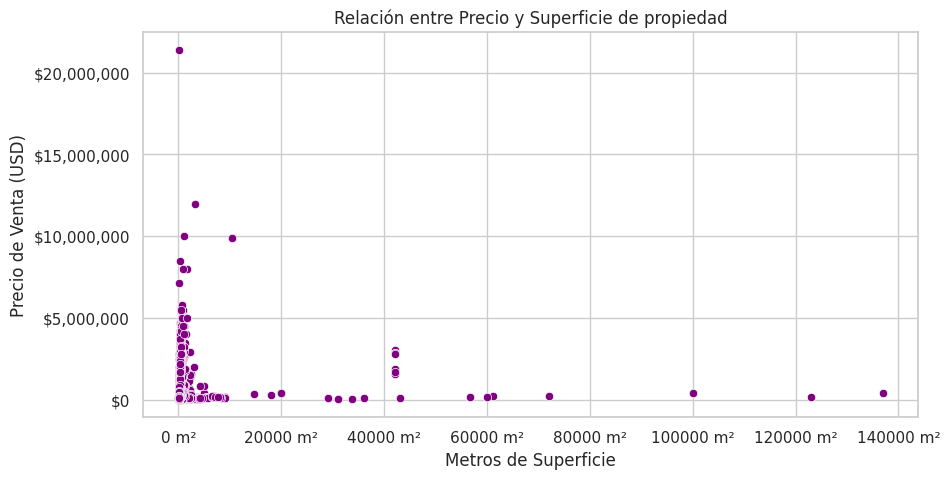

In [89]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='property_surface_total', y='property_price', data=anuncios_filtrados, color='purple')
plt.title('Relación entre Precio y Superficie de propiedad')
plt.xlabel('Metros de Superficie')
plt.ylabel('Precio de Venta (USD)')

# Aca damos formato del eje Y para mostrar valores cada 100,000
formatter = ticker.FuncFormatter(lambda x, pos: f'${int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

# Aca damos formato del eje X para mostrar "m²" junto a los valores
formatter_x = ticker.FuncFormatter(lambda x, pos: f'{int(x)} m²')
plt.gca().xaxis.set_major_formatter(formatter_x)

plt.grid(True)

En este caso, se pueden tomar comos casos átipicos:

a) Las propiedades con menor superficie con un precio alto.

b) Las propiedades con mayor superficie con un precio bajo.

Se consideran atipicos porque se espera el calculo que a mayor superficie mayor precio.
Se puede considerar que el factor que modifica estos valores es la zona donde se encuentra ubicada la propiedad.

